# [Data Analysis]
---
   

# 1. EDA

## 1-1. Summary of dataframe

In [1]:
# Import libraries for data analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# To plot figs on jupyter
%matplotlib inline

# Set max rows and columns to display
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)


In [2]:
# Import the dataframe containing short ideas and return data
df = pd.read_pickle('data/df_for_analysis_markit.pkl')

### Total number of articles in training set: 6425

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6425 entries, 0 to 6424
Data columns (total 69 columns):
datetime              6425 non-null datetime64[ns]
date                  6425 non-null datetime64[ns]
article_id            6425 non-null int64
author_id             6425 non-null int64
author_name           6425 non-null object
editors_pick          6425 non-null bool
company_name          6425 non-null object
ticker                6425 non-null object
article_url           6425 non-null object
author_url            6425 non-null object
5d_ret                6425 non-null float64
10d_ret               6425 non-null float64
20d_ret               6425 non-null float64
40d_ret               6425 non-null float64
60d_ret               6425 non-null float64
80d_ret               6425 non-null float64
100d_ret              6425 non-null float64
mkt_cap               6425 non-null float64
year                  6425 non-null int64
yr_qt                 6425 non-null object
yr_qt_str     

In [4]:
df.describe()

,article_id,author_id,5d_ret,10d_ret,20d_ret,40d_ret,60d_ret,80d_ret,100d_ret,mkt_cap,year,5d_ret_bi,10d_ret_bi,20d_ret_bi,40d_ret_bi,60d_ret_bi,80d_ret_bi,100d_ret_bi,util,boolq,boiq,tdq,contributor_since,Num_syl,Num_words,Num_sent,FE_idx,DC_idx,DC_dif_words,Smog_Grade_idx,FK_Grade_idx,CL_Grade_idx,ARI_Grade_idx,LW_Grade_idx,GFox_Grade_idx,neg_ratio_abs,pos_ratio_abs,unc_ratio_abs,lit_ratio_abs,cons_ratio_abs,sup_ratio_abs,int_ratio_abs,s_mod_ratio_abs,m_mod_ratio_abs,w_mod_ratio_abs,irv_ratio_abs,v_neg,v_pos,v_neu,v_comp,disclosure_cat_num,author_yrs
count,6.425000e+03,6.425000e+03,6.425000e+03,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6.425000e+03,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6419.000000,6.425000e+03,6.425000e+03,6.425000e+03,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000,6425.000000
mean,2.235232e+06,8.029336e+06,-2.006397e-03,-0.000229,0.006251,0.012085,0.021540,0.029192,0.036443,4.788454e+07,2013.858833,0.500856,0.492140,0.476887,0.473930,0.464280,0.456498,0.462724,0.342059,1.001312e+07,1.521347e+08,1.467535e+07,2011.897899,1926.143813,1249.200311,61.079689,41.752086,7.651139,235.811051,11.934428,9.672809,11.401306,11.160078,7.690636,17.182662,0.019613,0.010598,0.012053,0.002419,0.001232,0.000208,0.001900,0.006437,0.007403,0.005880,0.010794,0.056028,0.087974,0.854838,0.093748,2.789261,1.960934
std,1.117636e+06,1.122852e+07,8.532913e-02,0.119232,0.153368,0.208048,0.256021,0.298141,0.340749,1.067786e+08,1.305401,0.500038,0.499977,0.499504,0.499359,0.498761,0.498143,0.498647,0.315671,1.733961e+07,3.659007e+08,2.476785e+07,2.160980,1490.540058,940.874091,44.105679,9.392578,0.541356,157.124121,1.381116,1.911268,1.430014,2.192943,2.922406,1.959433,0.009502,0.005665,0.005792,0.004447,0.001697,0.000586,0.002164,0.004402,0.004171,0.003816,0.004943,0.022588,0.027626,0.032716,0.104466,1.404309,2.051379
min,3.170520e+05,4.760000e+02,-6.650891e-01,-0.713759,-0.720001,-0.886185,-0.827031,-0.838385,-0.912621,4.229858e+03,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2006.000000,4.000000,2.000000,1.000000,9.540000,0.100000,0.000000,0.000000,2.200000,-7.410000,-2.100000,0.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477230,-0.392175,1.000000,-2.000000
25%,1.329791e+06,7.901700e+05,-3.701441e-02,-0.049387,-0.068597,-0.095616,-0.114934,-0.128940,-0.146012,1.119068e+06,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035663,1.224465e+06,8.087220e+06,1.887337e+06,2011.000000,1071.000000,702.000000,35.000000,36.300000,7.280000,141.000000,11.000000,8.400000,10.440000,9.700000,5.750000,15.865519,0.013072,0.006734,0.007979,0.000000,0.000000,0.000000,0.000000,0.003378,0.004636,0.003203,0.007401,0.040213,0.069381,0.834826,0.027206,1.000000,0.000000
50%,2.145333e+06,3.022051e+06,-6.053048e-07,0.001008,0.006925,0.008863,0.015652,0.023284,0.023167,5.249111e+06,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.245463,4.008872e+06,2.162926e+07,6.352933e+06,2012.000000,1539.000000,1008.000000,49.000000,41.110000,7.630000,196.000000,11.900000,9.600000,11.370000,11.000000,7.083333,17.078750,0.018248,0.009790,0.011399,0.001025,0.000806,0.000000,0.001407,0.005682,0.006932,0.005258,0.010288,0.053255,0.086094,0.855767,0.092611,4.000000,1.000000
75%,3.233066e+06,9.642931e+06,3.284566e-02,0.048434,0.070428,0.104068,0.128616,0.157936,0.175175,3.070932e+07,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.652238,1.218706e+07,9.0

In [5]:
df_bi = df[['5d_ret_bi','10d_ret_bi','20d_ret_bi','40d_ret_bi','60d_ret_bi','80d_ret_bi','100d_ret_bi']]
df_bi.apply(pd.Series.value_counts)

,5d_ret_bi,10d_ret_bi,20d_ret_bi,40d_ret_bi,60d_ret_bi,80d_ret_bi,100d_ret_bi
0.0,3207,3263,3361,3380,3442,3492,3452
1.0,3218,3162,3064,3045,2983,2933,2973


## 1-2. Number of articles published by year

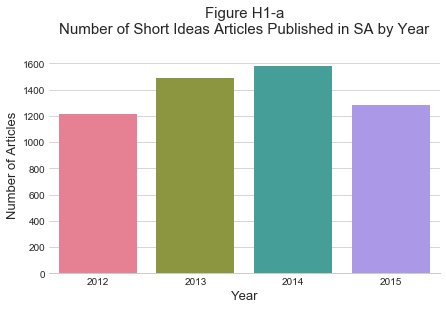

In [6]:
# Number of Short Ideas Articles Published in SA by Year
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, ax1 = plt.subplots(figsize=(7,4))

## ax1
# Setting
yr_lst = [2012, 2013, 2014, 2015]

# Draw a plot
g1 = sns.factorplot(x="year", data=df[['article_id','year']], kind="count", palette="husl", order=yr_lst, ax=ax1)
ax1.set_title('Figure H1-a\nNumber of Short Ideas Articles Published in SA by Year\n', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax1, left=True)

plt.close(g1.fig)

## 1-3. Number of articles published by year and quarter

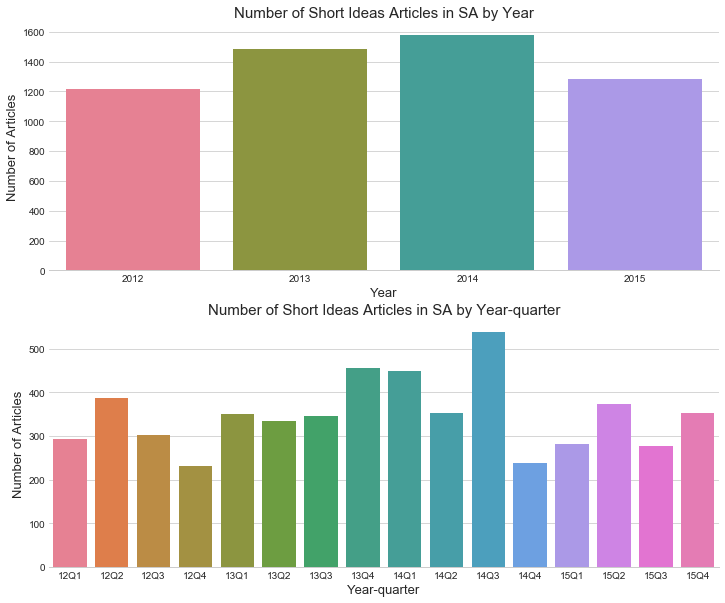

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

# Initialize figure and subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

## ax1
# Setting
yr_lst = [2012, 2013, 2014, 2015]

# Draw a plot
g1 = sns.factorplot(x="year", data=df[['article_id','year']], 
               kind="count", palette="husl", order=yr_lst, ax=ax1)
ax1.set_title('Number of Short Ideas Articles in SA by Year', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax1, left=True)

## ax2
# Setting
yr_qt_lst = ['12Q1','12Q2','12Q3','12Q4','13Q1','13Q2','13Q3','13Q4',\
             '14Q1','14Q2','14Q3','14Q4','15Q1','15Q2','15Q3','15Q4']
df['yr_qt_abb'] = df.yr_qt_str.str[2:]

# Draw a plot
g2 = sns.factorplot(x="yr_qt_abb", data=df[['article_id','yr_qt_abb']], kind="count",
                   palette="husl", order=yr_qt_lst, ax=ax2)
ax2.set_title('Number of Short Ideas Articles in SA by Year-quarter', fontsize=15)
ax2.set_xlabel('Year-quarter', fontsize=13)
ax2.set_ylabel('Number of Articles', fontsize=13)
sns.despine(ax=ax2, left=True)

plt.close(g1.fig)
plt.close(g2.fig)

## 1-4. Number of authors

In [8]:
# Number of unique authors
len(df.author_id.unique())

1492

## 1-5. Number of stocks discussed in the articles

In [9]:
# Number of unique stocks
len(df.ticker.unique())

1377

## 1-6. Future price direction summary

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


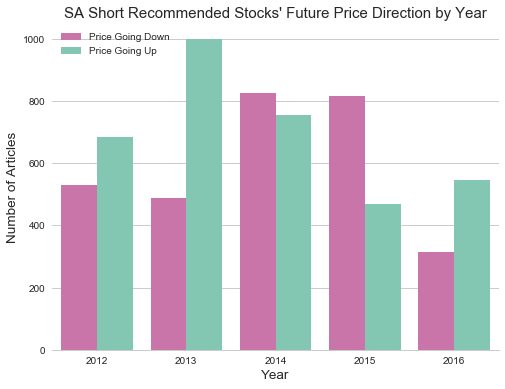

In [10]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','mkt_cap']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]

# Draw a nested violinplot and split the violins for easier comparison
sns.countplot(x="year", hue="100d_ret_bi", data=dfa, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=False)
ax1.set_title("SA Short Recommended Stocks' Future Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Number of Articles", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


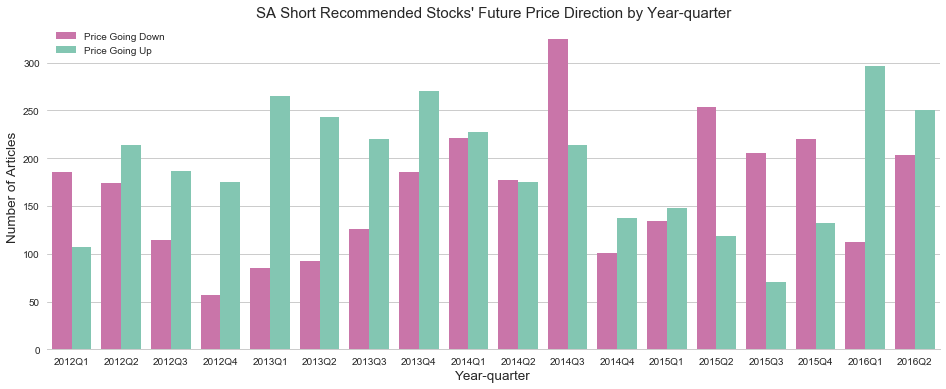

In [11]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(16, 6))

# Load dataset & settings
dfa = df[['yr_qt','100d_ret_bi','mkt_cap']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]

# Draw a nested violinplot and split the violins for easier comparison
sns.countplot(x="yr_qt", hue="100d_ret_bi", data=dfa, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=False)
ax1.set_title("SA Short Recommended Stocks' Future Price Direction by Year-quarter", 
              fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("Number of Articles", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=False)

# [Data Analysis of Training Set]
   

In [12]:
# Let's split training and test set and perform EDA only on training set
df = df[(df.yr_qt_str!='2015Q4')&(df.yr_qt_str!='2016Q1')&(df.yr_qt_str!='2016Q2')]

## 1-7. Feature variables vs. future price direction

## *Continuous variables*

In [13]:
# Correlation between 100-day returns and features
df[['100d_ret', 'util', 'mkt_cap','Num_sent','neg_ratio_abs','pos_ratio_abs','unc_ratio_abs',
    'v_neg','v_pos','v_neu','v_comp','author_yrs']].corr()

,100d_ret,util,mkt_cap,Num_sent,neg_ratio_abs,pos_ratio_abs,unc_ratio_abs,v_neg,v_pos,v_neu,v_comp,author_yrs
100d_ret,1.000000,-0.096368,0.066513,0.005104,-0.027881,0.035158,-0.004763,-0.012590,0.028566,-0.023464,0.020161,-0.035708
util,-0.096368,1.000000,-0.415811,0.134325,0.036979,-0.088943,0.007671,0.035736,-0.116746,0.075407,-0.092765,0.025506
mkt_cap,0.066513,-0.415811,1.000000,-0.084428,-0.058636,0.028676,-0.020411,-0.052283,0.020173,0.020534,0.044791,0.026521
Num_sent,0.005104,0.134325,-0.084428,1.000000,0.003014,-0.033766,0.004726,-0.064262,-0.001085,0.015014,0.010338,0.032591
neg_ratio_abs,-0.027881,0.036979,-0.058636,0.003014,1.000000,-0.119561,0.086044,0.613213,-0.205577,-0.234846,-0.523785,0.108056
pos_ratio_abs,0.035158,-0.088943,0.028676,-0.033766,-0.119561,1.000000,-0.058299,-0.058123,0.469138,-0.342596,0.377881,-0.084836
unc_ratio_abs,-0.004763,0.007671,-0.020411,0.004726,0.086044,-0.058299,1.000000,0.098644,-0.010488,-0.047512,-0.056499,0.010881
v_neg,-0.012590,0.035736,-0.052283,-0.064262,0.613213,-0.058123,0.098644,1.000000,-0.202316,-0.494454,-0.685500,0.082673
v_pos,0.028566,-0.116746,0.020173,-0.001085,-0.205577,0.469138,-0.010488,-0.202316,1.000000,-0.685099,0.768988,-0.080848
v_neu,-0.023464,0.075407,0.020534,0.015014,-0.234846,-0.342596,-0.047512,-0.494454,-0.685099,1.000000,-0.175656,0.019831


In [14]:
df.groupby('100d_ret_bi')['mkt_cap','Num_sent','neg_ratio_abs','pos_ratio_abs','unc_ratio_abs',
                          'v_neg','v_pos','v_neu','v_comp'].describe().T

100d_ret_bi                   0.0           1.0
mkt_cap       count  2.773000e+03  2.438000e+03
              mean   6.523871e+07  2.936395e+07
              std    1.210624e+08  8.044077e+07
              min    6.402480e+03  4.229858e+03
              25%    1.808377e+06  7.459449e+05
              50%    9.992802e+06  3.588075e+06
              75%    8.540716e+07  1.341637e+07
              max    6.925625e+08  7.698569e+08
Num_sent      count  2.773000e+03  2.438000e+03
              mean   5.783087e+01  5.928548e+01
              std    4.088208e+01  4.092836e+01
              min    3.000000e+00  3.000000e+00
              25%    3.300000e+01  3.400000e+01
              50%    4.700000e+01  4.800000e+01
              75%    6.900000e+01  7.200000e+01
              max    5.030000e+02  4.100000e+02
neg_ratio_abs count  2.773000e+03  2.438000e+03
              mean   1.891511e-02  1.962520e-02
              std    9.631291e-03  9.463310e-03
              min    0.000000e+00  0.000000e+00
              25%    1.243339e-02  1.311302e-02
              50%    1.745201e-02  1.833164e-02
              75%    2.369668e-02  2.451888e-02
              max    7.205240e-02  7.136405e-02
pos_ratio_abs count  2.773000e+03  2.438000e+03
              mean   1.066617e-02  1.041938e-02
              std    5.675309e-03  5.701193e-03
              min    0.000000e+00  0.000000e+00
              25%    6.784261e-03  6.538324e-03
              50%    9.815951e-03  9.644752e-03
              75%    1.387054e-02  1.329566e-02
              max    5.932203e-02  4.320988e-02
unc_ratio_abs count  2.773000e+03  2.438000e+03
              mean   1.198999e-02  1.186959e-02
              std    5.860329e-03  5.715704e-03
              min    0.000000e+00  0.000000e+00
              25%    8.035062e-03  7.779941e-03
              50%    1.120690e-02  1.126126e-02
              75%    1.532176e-02  1.514059e-02
              max    4.977376e-02  4.290822e-02
v_neg         count  2.773000e+03  2.438000e+03
              mean   5.470045e-02  5.572262e-02
              std    2.275317e-02  2.231190e-02
              min    0.000000e+00  0.000000e+00
              25%    3.865657e-02  4.017342e-02
              50%    5.152381e-02  5.335000e-02
              75%    6.739535e-02  6.823745e-02
              max    1.774762e-01  1.920000e-01
v_pos         count  2.773000e+03  2.438000e+03
              mean   8.938240e-02  8.730891e-02
              std    2.817853e-02  2.771022e-02
              min    0.000000e+00  0.000000e+00
              25%    7.040000e-02  6.833209e-02
              50%    8.737838e-02  8.524477e-02
              75%    1.057143e-01  1.035582e-01
              max    2.522000e-01  2.214783e-01
v_neu         count  2.773000e+03  2.438000e+03
              mean   8.546627e-01  8.560266e-01
              std    3.412583e-02  3.174878e-02
              min    4.772299e-01  6.666667e-01
              25%    8.338293e-01  8.368701e-01
              50%    8.560217e-01  8.569201e-01
              75%    8.768974e-01  8.767644e-01
              max    9.778000e-01  9.637500e-01
v_comp        count  2.773000e+03  2.438000e+03
              mean   1.003619e-01  9.317302e-02
              std    1.056016e-01  1.039207e-01
              min   -3.456562e-01 -3.921750e-01
              25%    3.264894e-02  2.467684e-02
              50%    9.672000e-02  9.170823e-02
              75%    1.621407e-01  1.581098e-01
              max    5.784267e-01  4.970887e-01

In [15]:
# mkt_cap by year
df.groupby(['100d_ret_bi','year'])['mkt_cap'].mean()

100d_ret_bi  year
0.0          2012    6.109796e+07
             2013    5.980615e+07
             2014    8.822192e+07
             2015    3.837621e+07
1.0          2012    4.317150e+07
             2013    2.661221e+07
             2014    2.292358e+07
             2015    2.822025e+07
Name: mkt_cap, dtype: float64

### Mkt_cap

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


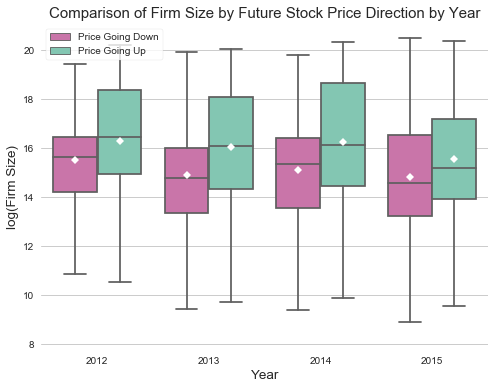

In [16]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','mkt_cap']]
dfa['log_mkt_cap'] = np.log(dfa.mkt_cap)
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="log_mkt_cap", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of Firm Size by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("log(Firm Size)", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


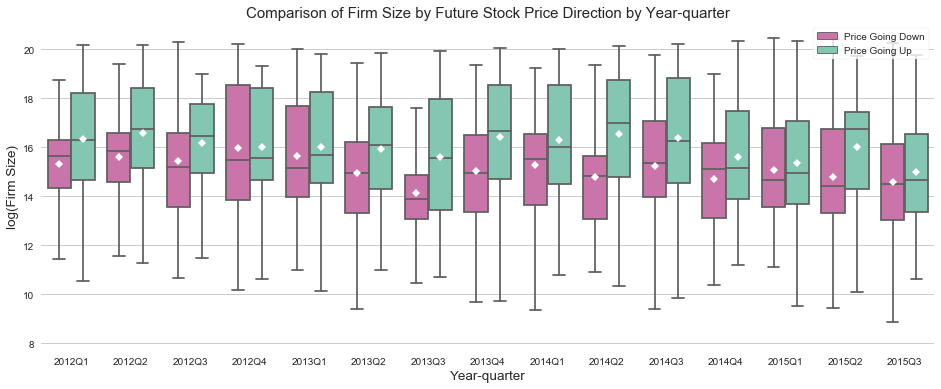

In [17]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(16, 6))

# Load dataset & settings
dfa = df[['yr_qt','100d_ret_bi','mkt_cap']]
dfa['log_mkt_cap'] = np.log(dfa.mkt_cap)
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="yr_qt", y="log_mkt_cap", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Comparison of Firm Size by Future Stock Price Direction by Year-quarter", fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("log(Firm Size)", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

### Util

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


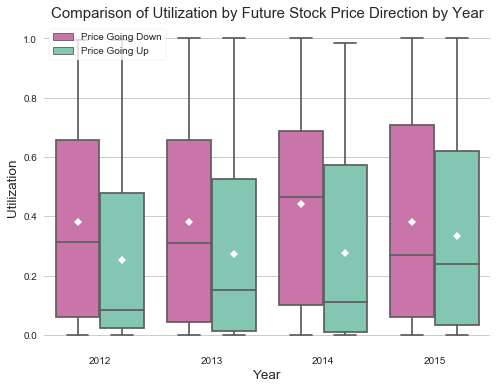

In [18]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','util']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="util", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of Utilization by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Utilization", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


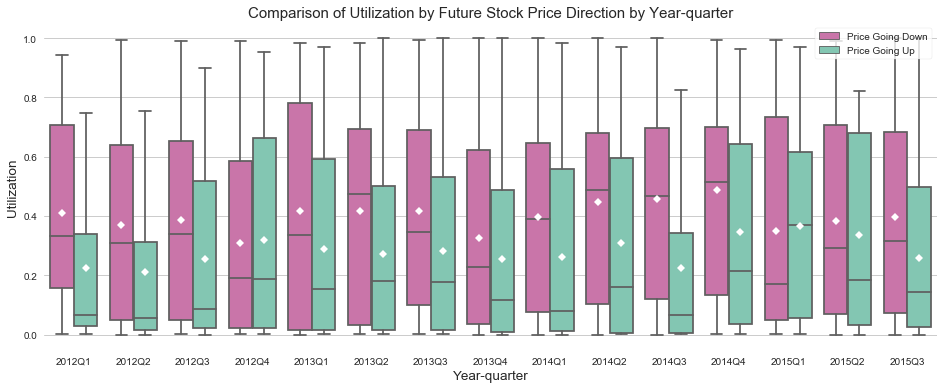

In [19]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(16, 6))

# Load dataset & settings
dfa = df[['yr_qt','100d_ret_bi','util']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="yr_qt", y="util", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Comparison of Utilization by Future Stock Price Direction by Year-quarter", fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("Utilization", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

### Num sent

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


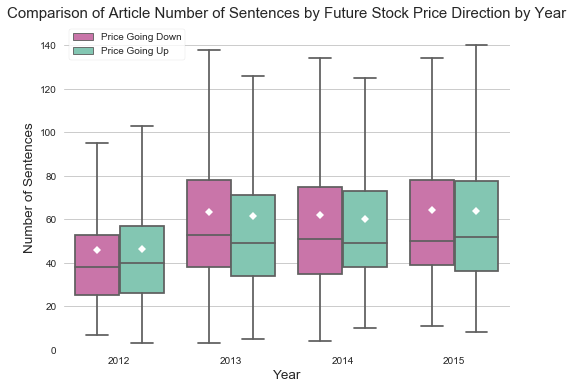

In [20]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','Num_sent']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="Num_sent", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of Article Number of Sentences by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Number of Sentences", fontsize=13.5)
ax1.set_ylim([0, 150])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


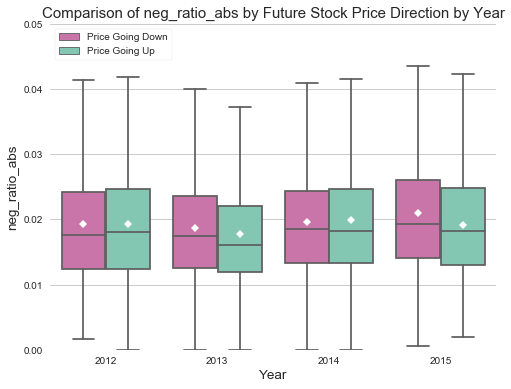

In [21]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','neg_ratio_abs']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="neg_ratio_abs", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of neg_ratio_abs by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("neg_ratio_abs", fontsize=13.5)
ax1.set_ylim([0, 0.05])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


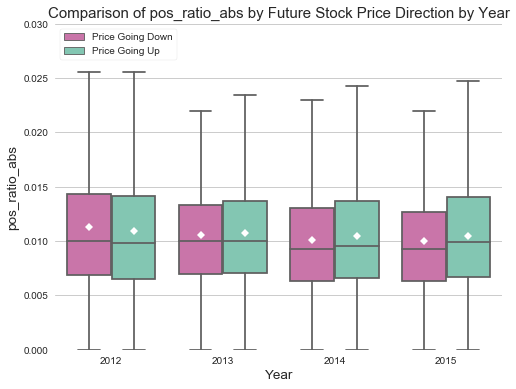

In [22]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','pos_ratio_abs']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="pos_ratio_abs", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of pos_ratio_abs by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("pos_ratio_abs", fontsize=13.5)
ax1.set_ylim([0, 0.03])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


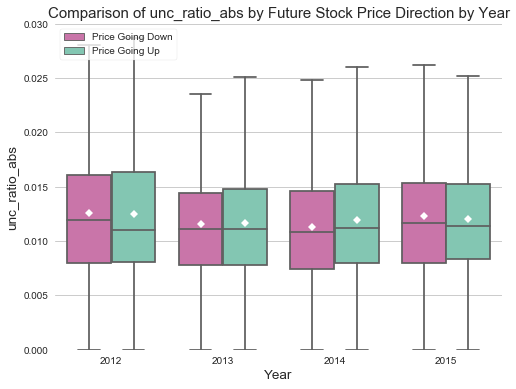

In [23]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','unc_ratio_abs']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="unc_ratio_abs", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of unc_ratio_abs by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("unc_ratio_abs", fontsize=13.5)
ax1.set_ylim([0, 0.03])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


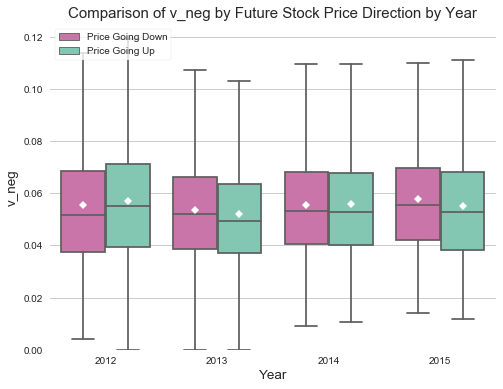

In [24]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','v_neg']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="v_neg", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of v_neg by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("v_neg", fontsize=13.5)
ax1.set_ylim([0, 0.125])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


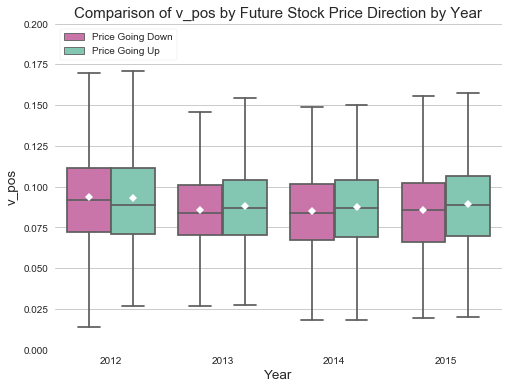

In [25]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','v_pos']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="v_pos", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of v_pos by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("v_pos", fontsize=13.5)
ax1.set_ylim([0, 0.20])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


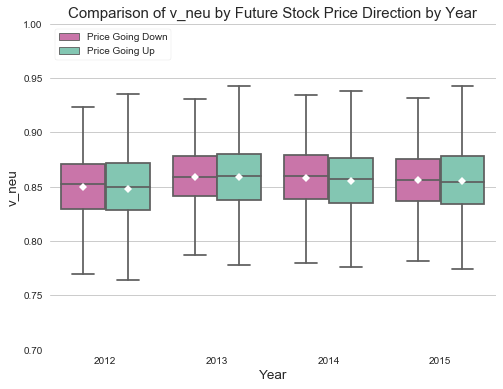

In [26]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','v_neu']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="v_neu", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of v_neu by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("v_neu", fontsize=13.5)
ax1.set_ylim([0.7, 1])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


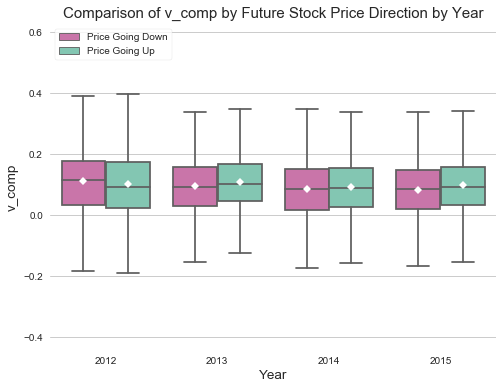

In [27]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','v_comp']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="v_comp", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of v_comp by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("v_comp", fontsize=13.5)
#ax1.set_ylim([0, 0.03])
sns.despine(ax=ax1, left=True, bottom=True)

## *Categorical variables*

### Overall time period

In [28]:
pd.crosstab(df['top5'], df['10d_ret_bi'], margins=True, normalize='index')

10d_ret_bi,0.0,1.0
top5,,
False,0.492637,0.507363
True,0.565318,0.434682
All,0.504702,0.495298


In [29]:
pd.crosstab(df['editors_pick'], df['40d_ret_bi'], margins=True, normalize='index')

40d_ret_bi,0.0,1.0
editors_pick,,
False,0.520474,0.479526
True,0.521891,0.478109
All,0.520629,0.479371


In [30]:
pd.crosstab(df['disclosure_cat'], df['60d_ret_bi'], margins=True, normalize='index')

60d_ret_bi,0.0,1.0
disclosure_cat,,
Long,0.597826,0.402174
No Position But May,0.572271,0.427729
No Position No Plan,0.537171,0.462829
Short,0.493764,0.506236
n/a,0.589744,0.410256
All,0.530225,0.469775


### By year

In [31]:
df.groupby(['top5', 'year'])['100d_ret_bi'].value_counts(normalize=True).sort_index()

top5   year  100d_ret_bi
False  2012  0.0            0.545913
             1.0            0.454087
       2013  0.0            0.656525
             1.0            0.343475
       2014  0.0            0.468873
             1.0            0.531127
       2015  0.0            0.350060
             1.0            0.649940
True   2012  0.0            0.636771
             1.0            0.363229
       2013  0.0            0.747899
             1.0            0.252101
       2014  0.0            0.514563
             1.0            0.485437
       2015  0.0            0.473684
             1.0            0.526316
Name: 100d_ret_bi, dtype: float64

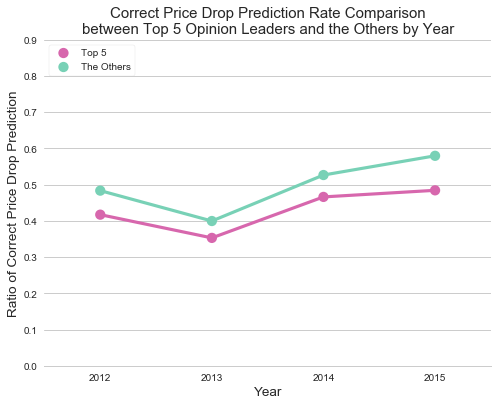

In [33]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
dfa = df.groupby(['top5', 'year'])['40d_ret_bi'].value_counts(normalize=True).sort_index()
top5 = list(dfa)[1::2][4:8]  # percentage of correct prediction from top5 opinion leaders
non_top5 = list(dfa)[1::2][0:4]  # percentage of correct prediction from non-top5 opinion leaders
df_dis = pd.DataFrame({'yr':yr, 'Top 5':top5, 'The Others':non_top5})
df_dis = df_dis.melt('yr', var_name='ol',  value_name='vals')

# Settings
palette = ["#d767ad", "#78d1b6"] #["#d767ad", "#b1d1fc"]
order = ['Top 5', 'The Others']

# Draw a plot
g1 = sns.factorplot(x="yr", y="vals", hue='ol', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Correct Price Drop Prediction Rate Comparison\nbetween Top 5 Opinion Leaders and the Others by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Ratio of Correct Price Drop Prediction", fontsize=13.5)
ax1.set_ylim([0, .9])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

In [34]:
df.groupby(['disclosure_cat', 'year'])['100d_ret_bi'].value_counts(normalize=True).sort_index()

disclosure_cat       year  100d_ret_bi
Long                 2012  0.0            0.536082
                           1.0            0.463918
                     2013  0.0            0.758929
                           1.0            0.241071
                     2014  0.0            0.574257
                           1.0            0.425743
                     2015  0.0            0.413793
                           1.0            0.586207
No Position But May  2012  0.0            0.577586
                           1.0            0.422414
                     2013  0.0            0.669811
                           1.0            0.330189
                     2014  0.0            0.566667
                           1.0            0.433333
                     2015  0.0            0.350877
                           1.0            0.649123
No Position No Plan  2012  0.0            0.570079
                           1.0            0.429921
                     2013  0.0            0

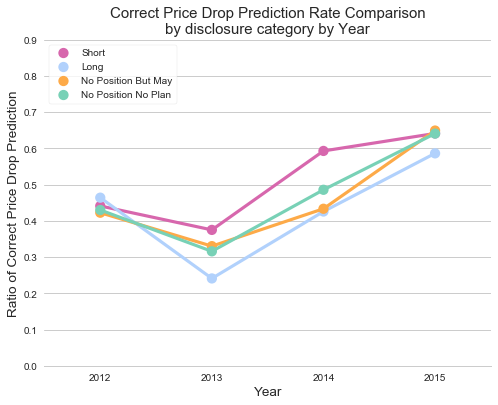

In [35]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
dfa = df.groupby(['disclosure_cat', 'year'])['100d_ret_bi'].value_counts(normalize=True).sort_index()
long = list(dfa)[1::2][0:4]  # percentage of correct prediction from articles in "Long" disclosure category
but_may = list(dfa)[1::2][4:8]  
no_plan = list(dfa)[1::2][8:12]  
short = list(dfa)[1::2][12:16]  

df_dis = pd.DataFrame({'yr':yr, 'Long':long, 'No Position But May':but_may, 
                       'No Position No Plan':no_plan, 'Short':short})
df_dis = df_dis.melt('yr', var_name='disclosure',  value_name='vals')

# Settings
palette = ["#d767ad", "#b1d1fc", "#fdaa48", "#78d1b6"]
order = ['Short', 'Long', 'No Position But May', 'No Position No Plan']

# Draw a plot
g1 = sns.factorplot(x="yr", y="vals", hue='disclosure', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Correct Price Drop Prediction Rate Comparison\nby disclosure category by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Ratio of Correct Price Drop Prediction", fontsize=13.5)
ax1.set_ylim([0, .9])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

In [36]:
df.groupby(['disclosure_short', 'year'])['100d_ret_bi'].value_counts(normalize=True).sort_index()

disclosure_short  year  100d_ret_bi
False             2012  0.0            0.563986
                        1.0            0.436014
                  2013  0.0            0.693694
                        1.0            0.306306
                  2014  0.0            0.523462
                        1.0            0.476538
                  2015  0.0            0.364686
                        1.0            0.635314
True              2012  0.0            0.558912
                        1.0            0.441088
                  2013  0.0            0.625000
                        1.0            0.375000
                  2014  0.0            0.407108
                        1.0            0.592892
                  2015  0.0            0.358896
                        1.0            0.641104
Name: 100d_ret_bi, dtype: float64

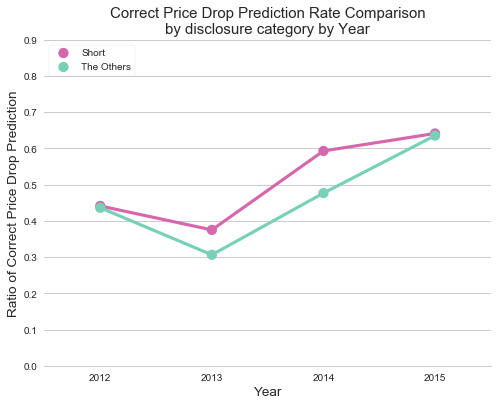

In [37]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load the dataset
yr = [2012, 2013, 2014, 2015]
dfa = df.groupby(['disclosure_short', 'year'])['100d_ret_bi'].value_counts(normalize=True).sort_index()
non_short = list(dfa)[1::2][0:4]  # percentage of correct prediction from articles in "Long" disclosure category  
short = list(dfa)[1::2][4:8]  

df_dis = pd.DataFrame({'yr':yr, 'Short':short, 'The Others':non_short})
df_dis = df_dis.melt('yr', var_name='disclosure',  value_name='vals')

# Settings
palette = ["#d767ad", "#78d1b6"] #["#d767ad", "#b1d1fc"]
order = ['Short', 'The Others']

# Draw a plot
g1 = sns.factorplot(x="yr", y="vals", hue='disclosure', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Correct Price Drop Prediction Rate Comparison\nby disclosure category by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Ratio of Correct Price Drop Prediction", fontsize=13.5)
ax1.set_ylim([0, .9])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

### By yr_qt

In [38]:
df.groupby(['top5', 'yr_qt'])['100d_ret_bi'].value_counts(normalize=True).sort_index()

top5   yr_qt   100d_ret_bi
False  2012Q1  0.0            0.336245
               1.0            0.663755
       2012Q2  0.0            0.518293
               1.0            0.481707
       2012Q3  0.0            0.618257
               1.0            0.381743
       2012Q4  0.0            0.751295
               1.0            0.248705
       2013Q1  0.0            0.748387
               1.0            0.251613
       2013Q2  0.0            0.713287
               1.0            0.286713
       2013Q3  0.0            0.608553
               1.0            0.391447
       2013Q4  0.0            0.570201
               1.0            0.429799
       2014Q1  0.0            0.504249
               1.0            0.495751
       2014Q2  0.0            0.498141
               1.0            0.501859
       2014Q3  0.0            0.378685
               1.0            0.621315
       2014Q4  0.0            0.563107
               1.0            0.436893
       2015Q1  0.0            0.48987

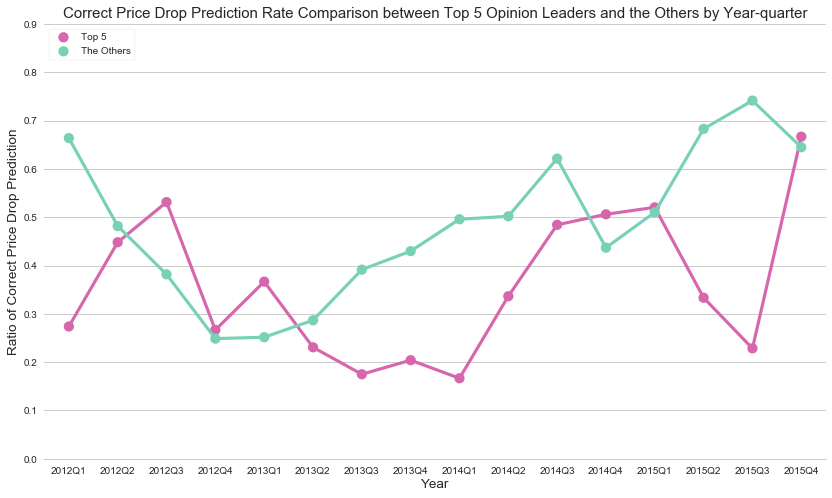

In [43]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(14, 8))

# Load the dataset
yr_qt_lst = ['2012Q1','2012Q2','2012Q3','2012Q4','2013Q1','2013Q2','2013Q3','2013Q4',\
             '2014Q1','2014Q2','2014Q3','2014Q4','2015Q1','2015Q2','2015Q3','2015Q4']
dfa = df.groupby(['top5', 'yr_qt'])['100d_ret_bi'].value_counts(normalize=True).sort_index()
top5 = list(dfa)[1::2][16:32]  # percentage of correct prediction from top5 opinion leaders
non_top5 = list(dfa)[1::2][0:16]  # percentage of correct prediction from non-top5 opinion leaders
df_dis = pd.DataFrame({'yr_qt':yr_qt_lst, 'Top 5':top5, 'The Others':non_top5})
df_dis = df_dis.melt('yr_qt', var_name='ol',  value_name='vals')

# Settings
palette = ["#d767ad", "#78d1b6"] #["#d767ad", "#b1d1fc"]
order = ['Top 5', 'The Others']

# Draw a plot
g1 = sns.factorplot(x="yr_qt", y="vals", hue='ol', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Correct Price Drop Prediction Rate Comparison between Top 5 Opinion Leaders and the Others by Year-quarter", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Ratio of Correct Price Drop Prediction", fontsize=13.5)
ax1.set_ylim([0, .9])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

In [44]:
df.groupby(['disclosure_cat', 'yr_qt'])['100d_ret_bi'].value_counts(normalize=True).sort_index()

disclosure_cat       yr_qt   100d_ret_bi
Long                 2012Q1  0.0            0.259259
                             1.0            0.740741
                     2012Q2  0.0            0.562500
                             1.0            0.437500
                     2012Q3  0.0            0.777778
                             1.0            0.222222
                     2012Q4  0.0            0.650000
                             1.0            0.350000
                     2013Q1  0.0            0.950000
                             1.0            0.050000
                     2013Q2  0.0            0.782609
                             1.0            0.217391
                     2013Q3  0.0            0.666667
                             1.0            0.333333
                     2013Q4  0.0            0.733333
                             1.0            0.266667
                     2014Q1  0.0            0.647059
                             1.0            0.352941
     

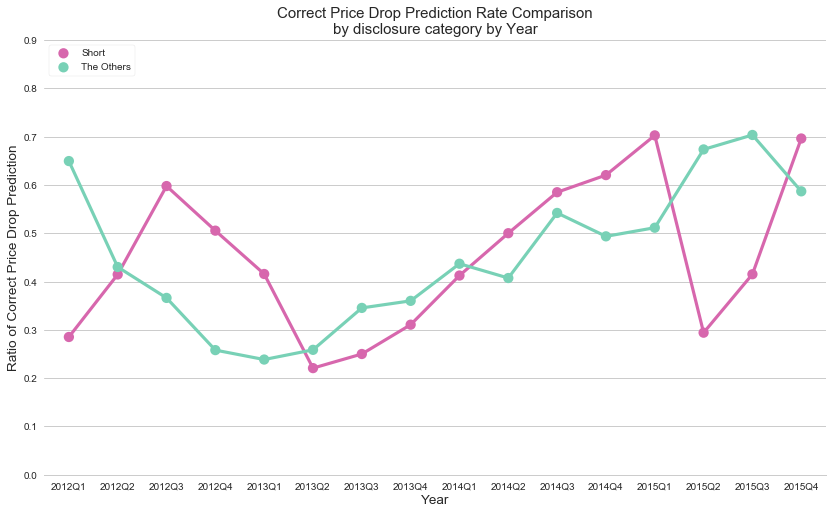

In [45]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(14, 8))

# Load the dataset
yr_qt_lst = ['2012Q1','2012Q2','2012Q3','2012Q4','2013Q1','2013Q2','2013Q3','2013Q4',\
             '2014Q1','2014Q2','2014Q3','2014Q4','2015Q1','2015Q2','2015Q3','2015Q4']
dfa = df.groupby(['disclosure_short', 'yr_qt'])['100d_ret_bi'].value_counts(normalize=True).sort_index()
non_short = list(dfa)[1::2][0:16]  # percentage of correct prediction from articles in the other disclosure category  
short = list(dfa)[1::2][16:32]  # percentage of correct prediction from articles in "Short" disclosure category 

df_dis = pd.DataFrame({'yr_qt':yr_qt_lst, 'Short':short, 'The Others':non_short})
df_dis = df_dis.melt('yr_qt', var_name='disclosure',  value_name='vals')

# Settings
palette = ["#d767ad", "#78d1b6"]
order = ['Short', 'The Others']

# Draw a plot
g1 = sns.factorplot(x="yr_qt", y="vals", hue='disclosure', hue_order=order, data=df_dis, palette=palette, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Correct Price Drop Prediction Rate Comparison\nby disclosure category by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Ratio of Correct Price Drop Prediction", fontsize=13.5)
ax1.set_ylim([0, .9])
sns.despine(ax=ax1, left=True, bottom=False)
plt.close(g1.fig)

# [Data Analysis of Test Set]

In [42]:
# Import the dataframe containing short ideas and return data
df = pd.read_pickle('data/df_for_analysis_markit.pkl')

### Mkt_cap

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


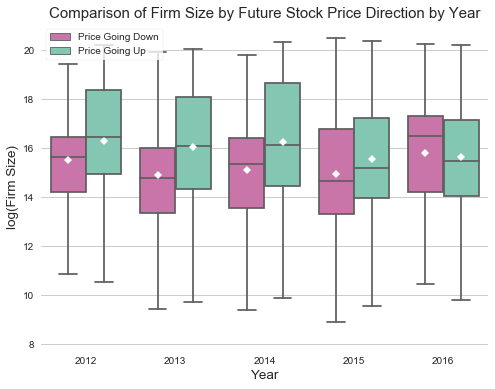

In [48]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','mkt_cap']]
dfa['log_mkt_cap'] = np.log(dfa.mkt_cap)
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="log_mkt_cap", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of Firm Size by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("log(Firm Size)", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


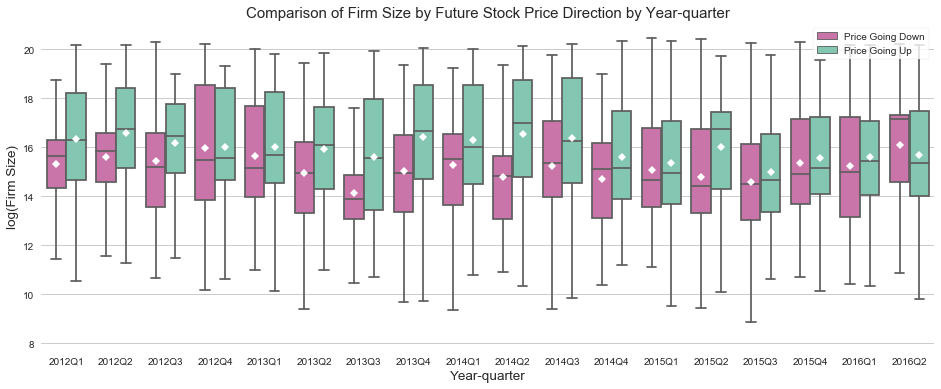

In [49]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(16, 6))

# Load dataset & settings
dfa = df[['yr_qt','100d_ret_bi','mkt_cap']]
dfa['log_mkt_cap'] = np.log(dfa.mkt_cap)
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="yr_qt", y="log_mkt_cap", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Comparison of Firm Size by Future Stock Price Direction by Year-quarter", fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("log(Firm Size)", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

### Util

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


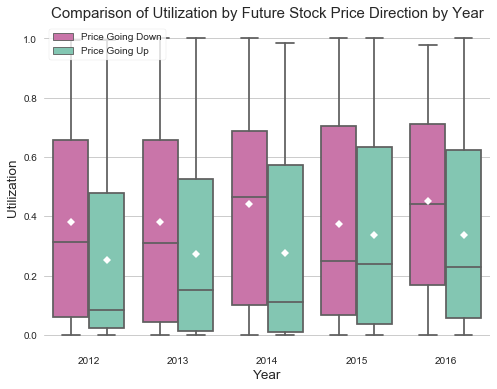

In [50]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(8, 6))

# Load dataset & settings
dfa = df[['year','100d_ret_bi','util']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="year", y="util", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper left", frameon=True)
ax1.set_title("Comparison of Utilization by Future Stock Price Direction by Year", 
              fontsize=15)
ax1.set_xlabel("Year", fontsize=13.5)
ax1.set_ylabel("Utilization", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


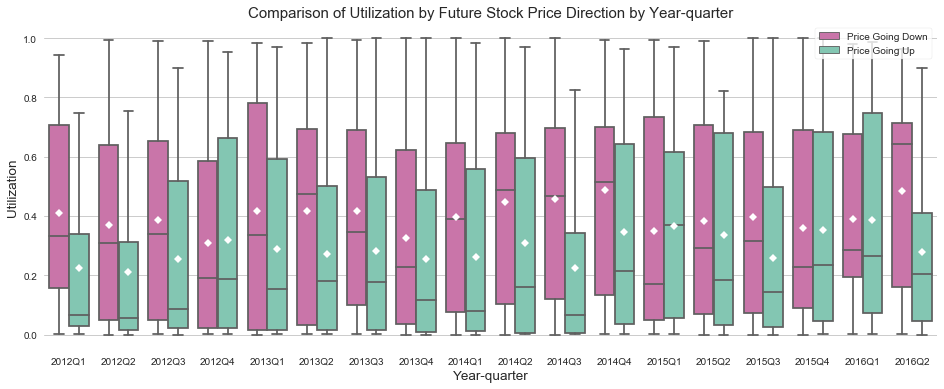

In [51]:
# Disclosure Categoy by Year
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(16, 6))

# Load dataset & settings
dfa = df[['yr_qt','100d_ret_bi','util']]
dfa.loc[df['100d_ret_bi']==True, '100d_ret_bi']='Price Going Down'
dfa.loc[df['100d_ret_bi']==False, '100d_ret_bi']='Price Going Up'
palette = ["#d767ad", "#78d1b6"]
meanpointprops = dict(marker='D', markeredgecolor='w', markerfacecolor='w')

# Draw a nested violinplot and split the violins for easier comparison
sns.boxplot(x="yr_qt", y="util", hue="100d_ret_bi", data=dfa, palette=palette, fliersize=0,
            showmeans=True, meanprops=meanpointprops, ax=ax1)

# Add a legend and informative axis label
ax1.legend(ncol=1, loc="upper right", frameon=True)
ax1.set_title("Comparison of Utilization by Future Stock Price Direction by Year-quarter", fontsize=15)
ax1.set_xlabel("Year-quarter", fontsize=13.5)
ax1.set_ylabel("Utilization", fontsize=13.5)
#ax1.set_ylim([0, 2*(10^8)])
sns.despine(ax=ax1, left=True, bottom=True)